In [1]:
from decimal import *
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

getcontext().prec = 14

In [18]:
def taylor(x_0, f, it, x_1 = 0, h = 0):
    it += 1

    fact = [1]*(it+1)
    for i in range(1,it+1):
        fact[i] = i*fact[i-1]

    if h == 0:
        h = (x_1 - x_0)
    #f0 = f(x_0)
    f0 = f.evalf(subs={x:x_0})
    fi = f0
    R_n = 0

    f_log, R_n_log = [], []
    for i in range(1,it+1):
        fi = fi + R_n
        f_log.append(fi)

        R_n = sym.diff(f, x, i).evalf(subs={x:x_0}) * (h**i)/fact[i]
        R_n_log.append(R_n)
    return f_log, R_n_log

In [19]:
x = sym.symbols('x')
#func = sym.exp(x)
func = -0.1*x**4 - 0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2
#func = sym.cos(x)

iter = 4

#f_log, R_n_log = taylor(x_0=0.5, f=func, it=6, x_1=1.1)
f_log, R_n_log = taylor(x_0=0, f=func, it=iter, h=1)
#f_log, R_n_log = taylor(float(sym.pi)/4, func, 6, x_1=float(sym.pi)/3)
for i in range(len(f_log)):
    print('['+str(i)+']:',f_log[i],'\t|', R_n_log[i])

[0]: 1.20000000000000 	| -0.250000000000000
[1]: 0.950000000000000 	| -0.500000000000000
[2]: 0.450000000000000 	| -0.150000000000000
[3]: 0.300000000000000 	| -0.100000000000000
[4]: 0.200000000000000 	| 0


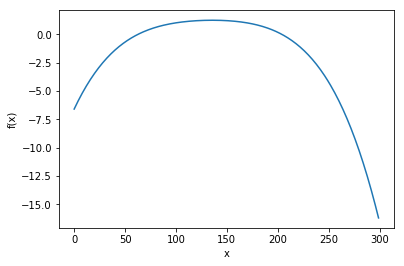

In [20]:
x_r = np.linspace(-3, 3, 300)
gr = [func.evalf(subs={x:v}) for v in x_r]
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(gr)
plt.show()

In [ ]:
#backup
#def taylor(x_0, x_1, tolerance, f, it, h = 0):
#f_log, R_n_log = taylor(0, 1, 0, func, iter)
#f_log, R_n_log = taylor(0.5, 1.1, 0, func, 6)